In [7]:
# Imports
import random
import re

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

pd.options.display.max_rows = 1000
pd.options.display.max_colwidth = 200

Topic 0:
marketing experience team development design work business digital data product
Topic 1:
work employment information position experience skills state employees case law
Topic 2:
program compliance legal employment state public housing work staff required
Topic 3:
business team experience work status skills company financial us including
Topic 4:
experience project management systems software development projects construction work system
Topic 5:
work team youll us customers benefits best looking customer year
Topic 6:
care work health medical patient experience team patients benefits service
Topic 7:
education care experience health nursing required students school may requirements
Topic 8:
customer sales work ability customers service experience skills required business
Topic 9:
work management experience team skills leadership ability organization including financial


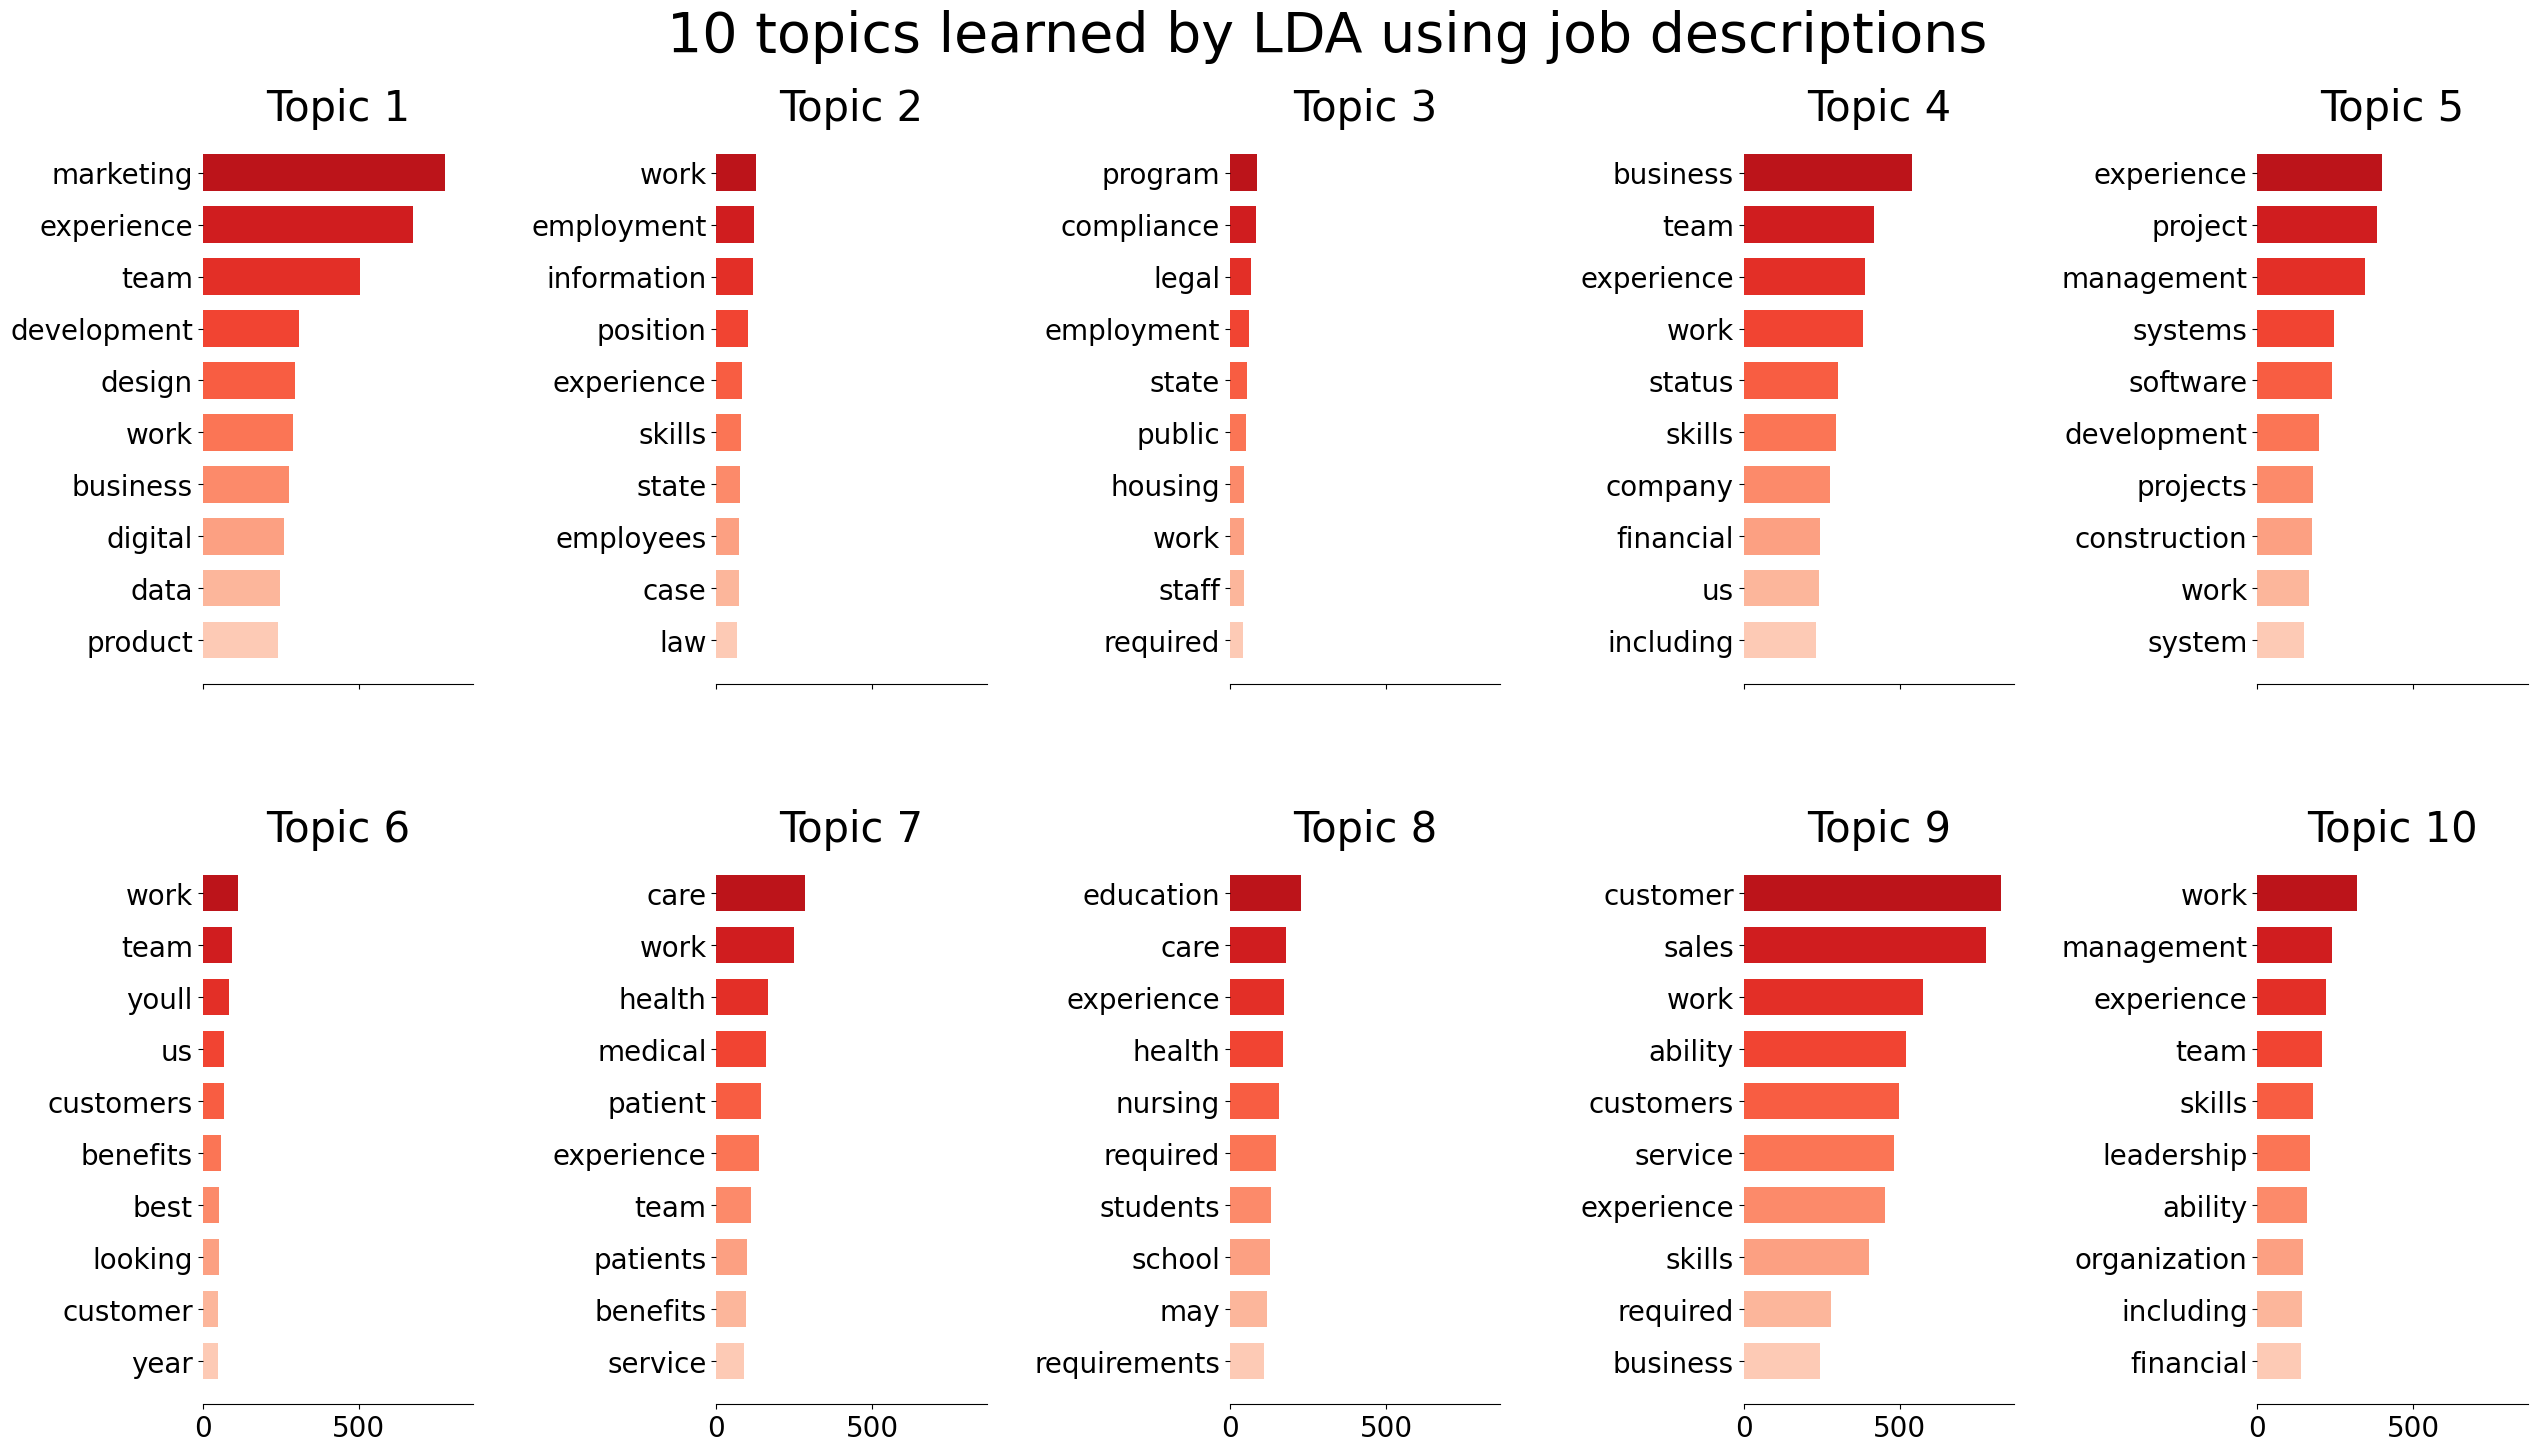

In [8]:

df = pd.read_csv('./datasets/cleaned-job-descriptions.csv')

df['job_description'] = df['job_description'].apply(lambda x: x.lower())
# remove punctuation and numbers
df['job_description'] = df['job_description'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))
#remove \n
df['job_description'] = df['job_description'].apply(lambda x: x.replace('\n', ' '))


# remove stopwords
#nltk.download('stopwords')
#nltk.download('punkt')
job_stopwords = stopwords.words('english')

job_stopwords.extend(['new', 'one', 'must', 'job', 'per', 'ceo'])

def remove_stopwords(description):
    # Tokenize the description
    tokens = word_tokenize(description)
    # Remove stopwords 
    filtered_tokens = [word for word in tokens if word not in job_stopwords]
    # Rejoin the filtered tokens into a string
    filtered_description = ' '.join(filtered_tokens)
    return filtered_description

# Apply the cleaning function to each description
df['job_description'] = df['job_description'].apply(remove_stopwords)
# save the cleaned data
df.to_csv('./datasets/cleaned-job-descriptions.csv', index=False)

# Latent Dirichlet Allocation (LDA) Model using scikit-learn
data = df
# Create a CountVectorizer for LDA
vectorizer = CountVectorizer(stop_words=job_stopwords, max_df=0.95, min_df=2)
count_data = vectorizer.fit_transform(data['job_description'])

n_topics = 10
lda = LatentDirichletAllocation(n_components=n_topics)
lda.fit(count_data)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)

colormaps = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu','GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    color = random.choice(colormaps)
    colors = plt.get_cmap(color)(np.linspace(0.2, 0.8, n_top_words))

    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7, color=colors)  # Specify the colors for each bar
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

plot_top_words(lda, vectorizer.get_feature_names_out(), no_top_words, f'{no_top_words} topics learned by LDA using job descriptions')

In [9]:
# wordcloud
# from wordcloud import WordCloud
# long_string = ' '.join(df['job_description'])
# wordcloud = WordCloud(width=2000, height=1400, background_color='white').generate(long_string)
# wordcloud.to_file('./wordclouds/job_wordcloud.png')